**Homework Day 11 - Data Manipulation with Python**

**Author: Ahmad Ichsan Baihaqi**

**Email: ahmadichsanbaihaqi@gmail.com**

Disclaimer, because this homework is quite similar with previous homework [(d8)](https://github.com/ahmadichsan/python-task-d8), this file ipynb will be also quite similar with it.

Intro (personal note):

Data profiling is a powerful way to analyze millions of rows of data to identify errors, missing information, and any anomalies that may affect the quality of information. By profiling data, you get to see all the underlying problems with your data that you would otherwise not be able to see.

Data cleansing is the second step after profiling. Once you identify the flaws within your data, you can take the steps necessary to clean the flaws [[reference]](https://dataladder.com/data-profiling-vs-data-cleansing/).

In this task, I would like to do profiling data cleansing and data manipulation using [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn) dataset. There are several points that I'd like to handle:

1. Find total columns (variable)
2. Find total rows (observation)
3. Listing and uniforms column names (for column name inconsistency)
4. Finding and handling missing values
5. Finding and handling anomalies/outliers
6. Listing unique values (for categorical variable, after cleansing)
7. Show max, min, mean, median and standard deviation (for numerical variable, after cleansing)
8. Data standardization (for numerical variable, after cleansing)
9. Categorical data encoding

In [115]:
## Import Lib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [116]:
## Import Data

data = pd.read_csv('Telco Customer Churn.csv')

data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Find total columns (variable) and Find total rows (observation)**

The fastest way to get the shape of our dataset (total column and total row) is by using ```data.shape```. ```data.shape``` will return tuple that represents number of rows and number of columns, respectively.

Another way, we can use ```data.columns``` to list all columns in our dataset. Then, use ```len``` to calculate the length of our list columns. ```data.index``` to get the range of our dataset, then use ```len``` to get the total rows.

In [117]:
## Find total columns (variable) and Find total rows (observation)
data.shape

(7043, 21)

In [118]:
## Find total columns (variable)
len(data.columns)

21

In [119]:
## Find total rows (observation) => find the index of our dataset
data.index

RangeIndex(start=0, stop=7043, step=1)

In [120]:
## Find total rows (observation)
len(data.index)

7043

**Listing and uniforms column names (for column name inconsistency)**

```data.columns``` will return column names of our dataset.

In [122]:
## Listing and uniforms column names (for column name inconsistency)

col_names = list(data.columns)
col_names

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

**Listing and uniforms column names (for column name inconsistency)**

Based on above exploration, we found that some of them using PascalCase (e.g. SeniorCitizen, TechSupport), some of them using camelCase (e.g. customerID) and lowercase (e.g. tenure). In order create consistency, I'd like to uniform all of the column into PascalCase.

In [123]:
## Listing and uniforms column names (for column name inconsistency)
import stringcase

## Convert into PascalCase
data = data.rename(columns = lambda x: stringcase.pascalcase(x))

col_names = list(data.columns)
col_names

['CustomerID',
 'Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'Tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [124]:
## Finding and handling missing values

def find_missing_value(data_frame):
    missing_data = data_frame.isnull().sum(axis=0).reset_index()
    missing_data.columns = ['variable', 'missing values']
    missing_data['filling factor (%)'] = (data_frame.shape[0]-missing_data['missing values'])/data_frame.shape[0]*100
    return missing_data.sort_values('filling factor (%)').reset_index(drop = True)

find_missing_value(data)

,variable,missing values,filling factor (%)
0,CustomerID,0,100.0
1,MonthlyCharges,0,100.0
2,PaymentMethod,0,100.0
3,PaperlessBilling,0,100.0
4,Contract,0,100.0
5,StreamingMovies,0,100.0
6,StreamingTV,0,100.0
7,TechSupport,0,100.0
8,DeviceProtection,0,100.0
9,TotalCharges,0,100.0


**Finding and handling missing values**

Based on above observation, there is no missing value. But, are you sure? [Here](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b) is reference for below code.

In [125]:
## Finding and handling missing values
## Now, let's try to re-assign data variable with different way of import the dataset
## By doing this, our empty/whitespace value will be converted to NA

missing_values = [" "]
data = pd.read_csv("Telco Customer Churn.csv", na_values = missing_values)
data.columns = col_names

## Now, let's take a look again if there is any missing value
find_missing_value(data)

,variable,missing values,filling factor (%)
0,TotalCharges,11,99.843817
1,CustomerID,0,100.000000
2,MonthlyCharges,0,100.000000
3,PaymentMethod,0,100.000000
4,PaperlessBilling,0,100.000000
5,Contract,0,100.000000
6,StreamingMovies,0,100.000000
7,StreamingTV,0,100.000000
8,TechSupport,0,100.000000
9,DeviceProtection,0,100.000000


**Finding and handling missing values**

Look, now we found that TotalCharges feature has 11 missing value. What we should do to handle missing value in TotalCharges feature? In general, we can do two things to handle the missing value:

1. Drop the row that has missing value in one of the column
2. Fill the missing value column with several options:
   a. mean
   b. median
   c. mode
   d. other "reasonable" value

But, drop a row, most of the time, is not recommended. Why? More often than not, Missing Values actually represent major bits & pieces of information, [[reference]](https://towardsdatascience.com/few-reasons-to-not-drop-missing-values-575a8d2b6a41).

Then, another options we have is to fill the missing value, TotalCharges. But, how we could decide what value to be set to replace the missing value in TotalCharges? Let's take a look at the definition of TotalCharges feature.

TotalCharges is a feature that represent the total amount charged to the customer. Now, let's see all data where the TotalCharges is missing to obtain more insight.

In [126]:
## Finding and handling missing values

null_data = data[data.isnull().any(axis=1)]

null_data[['Tenure', 'TotalCharges']]

,Tenure,TotalCharges
488,0,NaN
753,0,NaN
936,0,NaN
1082,0,NaN
1340,0,NaN
3331,0,NaN
3826,0,NaN
4380,0,NaN
5218,0,NaN
6670,0,NaN


**Finding and handling missing values**

Based on above observation, all TotalCharges with missing value has 0 for their tenure value. Tenure is the number of months the customer has stayed with the company. So, it means, TotalCharges with missing value is because the customer is not charged yet. So, the best way to handle TotalCharges missing value is to fill it with zero (0). But, let's see how to drop rows with missing value (for learning purposes)

In [127]:
## Finding and handling missing values - dropna

data_to_be_dropped = data

data_to_be_dropped = data_to_be_dropped.dropna()

In [128]:
## Finding and handling missing values - dropna (result)

print(f'Total rows original data: {len(data.index)}')
print(f'Total rows dropped missing value data: {len(data_to_be_dropped.index)}')

find_missing_value(data_to_be_dropped)

Total rows original data: 7043
Total rows dropped missing value data: 7032


,variable,missing values,filling factor (%)
0,CustomerID,0,100.0
1,MonthlyCharges,0,100.0
2,PaymentMethod,0,100.0
3,PaperlessBilling,0,100.0
4,Contract,0,100.0
5,StreamingMovies,0,100.0
6,StreamingTV,0,100.0
7,TechSupport,0,100.0
8,DeviceProtection,0,100.0
9,TotalCharges,0,100.0


In [129]:
## Finding and handling missing values

data['TotalCharges'].fillna(value = 0.00, inplace = True)

data.loc[data['TotalCharges'] == 0]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


**Finding and handling anomalies/outliers**

In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations. Therefore, if you have any data point that is more than 3 times the standard deviation, then those points are very likely to be anomalous or outliers [[reference]](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623).

In [130]:
## Finding and handling anomalies/outliers

def find_anomalies(data_set):
    # define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(data_set)
    data_mean = np.mean(data_set)
    anomaly_cut_off = data_std * 3
    
    lower_limit = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off

    for anomaly in data_set:
        if anomaly > upper_limit or anomaly < lower_limit:
            anomalies.append(anomaly)
    return anomalies

def find_data_set_anomalies(data_set, columns):
    result = []
    
    for item in columns:
        result.append(find_anomalies(data_set[item]))
        
    return result

def find_upper_outliers(data_set):
    q1 = data_set.quantile(0.25)
    q3 = data_set.quantile(0.75)
    iqr = q3 - q1
    
    upper_bound = q3 + (1.5 * iqr)
    
    outliers = [item for item in data_set if item > upper_bound]
    
    return outliers

def find_lower_outliers(data_set):
    q1 = data_set.quantile(0.25)
    q3 = data_set.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    
    outliers = [item for item in data_set if item < lower_bound]
    
    return outliers

def find_data_set_upper_outliers(data_set, columns):
    result = []
    
    for item in columns:
        result.append(find_upper_outliers(data_set[item]))
        
    return result

def find_data_set_lower_outliers(data_set, columns):
    result = []
    
    for item in columns:
        result.append(find_lower_outliers(data_set[item]))
        
    return result

In [131]:
## Finding and handling anomalies/outliers

numeric_column = ['MonthlyCharges', 'TotalCharges']

outlier_anomaly_result = pd.DataFrame({
    'variable': numeric_column,
    'anomalies': find_data_set_anomalies(data, numeric_column),
    'lower_outlier': find_data_set_lower_outliers(data, numeric_column),
    'upper_outlier': find_data_set_upper_outliers(data, numeric_column),
})

outlier_anomaly_result

,variable,anomalies,lower_outlier,upper_outlier
0,MonthlyCharges,[],[],[]
1,TotalCharges,[],[],[]


**Finding and handling anomalies/outliers**

Based on above calculation using the concept of anomaly and outlier, there are no outlier in our numerical dataset (both MonthlyCharges and TotalCharges). Let's see below boxplot to get the view of our dataset.

<AxesSubplot:>

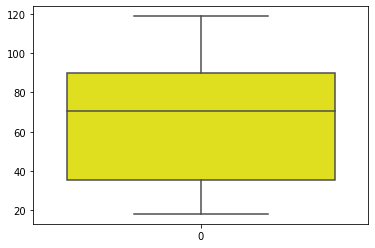

In [132]:
## Finding and handling anomalies/outliers

sns.boxplot(data=data['MonthlyCharges'], color = "yellow")

<AxesSubplot:>

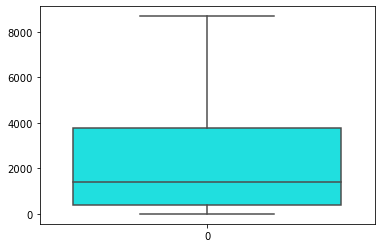

In [133]:
## Finding and handling anomalies/outliers

sns.boxplot(data=data['TotalCharges'], color = "cyan")

**Finding and handling anomalies/outliers**

Based on above calculation and visualization, we found out that there are no anomaly nor outlier in our dataset.

**Listing unique values (for categorical variable, after cleansing)**

Unique value of categorical data will give more insight if visualize using graph/plot which in a scope of data visualization. In order to get unique value of a column programmatically, we could use ```.unique()``` API. Below is example to get unique value of a column.

P.S., I want to display unique value of a column with the most unique value. Instead of find it manually one by one, I create the program to find column with the most unique value XD.

In [134]:
## Listing unique values (for categorical variable, after cleansing)

col_name_exclude_cust_id = list(filter(lambda x: x != 'CustomerID', data.columns))

def find_object_column(col_name):
    col_name_result = []
    
    for item in col_name:
        if (data[item].dtype == 'object'):
            col_name_result.append(item)
    
    return col_name_result

col_object = find_object_column(col_name_exclude_cust_id)

def find_col_with_most_unique(col_name):
    current_most_unique_col = ''
    current_most_unique = 0
    
    for item in col_name:
        item_unique = len(data[item].unique())
                          
        if (item_unique > current_most_unique):
            current_most_unique = item_unique
            current_most_unique_col = item
    
    return current_most_unique_col

most_unique_column = find_col_with_most_unique(col_object)

data[most_unique_column].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

**Show max, min, mean, median and standard deviation (for numerical variable, after cleansing)**

The easiest way to get all of those information within our dataset is by doing ```data.describe()```. As a note, this method will return the summary (describe) all variable with numerical value, included a variable that already encoded, such as ```SeniorCitizen``` column below.

In [135]:
## Show max, min, mean, median and standard deviation (for numerical variable, after cleansing)

data.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Data standardization (for numerical variable, after cleansing)**

Disclaimer, please correct me if I'm wrong XD.

Before we talk about standardization, let's talk a little about our data. Datasets which we as data scientist use to build a model for a particular problem statement is usually built from various sources. Thus, it can be assumed that the data set contains variables/features of different scales.

In order for our machine learning or deep learning model to work well, it is very necessary for the data to have the same scale in terms of the Feature to avoid bias in the outcome. Thus, **Feature Scaling** is considered an important step prior to the modeling.

Feature Scaling can be broadly classified into the below categories:
1. Normalization
2. Standardization (we gonna talk about this)

**Standardization** is used on the data values that are **normally distributed**. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1 [(1)]('https://www.askpython.com/python/examples/standardize-data-in-python').

Okay, now, does it means we need to normalized the data (data transformation) if our dataset is not normally distributed before doing standardization? Well, might be not. One of data transformation is log-transform. Transforming into another distribution means making all of them closer. For a counter-ex, think about a feature which is already normal. If you log-transform it won't be normal [(2)]('https://stats.stackexchange.com/questions/483187/difference-between-log-transformation-and-standardization#comment891852_483189').

Moreover, - glad we found another reference - Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian [(3)]('https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff').

So, for learning purposes, let's visualize our datset to check if it is normally distributed or not. Then, whether the data is gaussian or not, we will do the standardization.

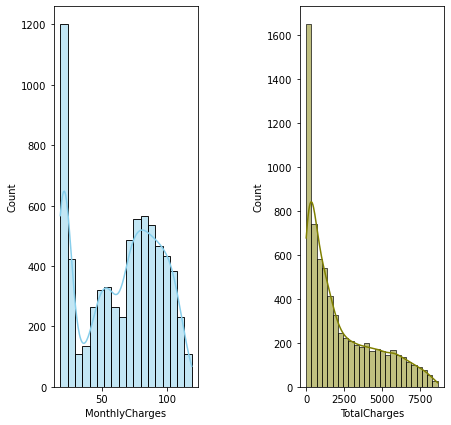

In [136]:
## Data standardization (for numerical variable, after cleansing)

fig, axs = plt.subplots(1, 2, figsize=(7, 7))

sns.histplot(data=data, x="MonthlyCharges", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=data, x="TotalCharges", kde=True, color="olive", ax=axs[1])

plt.subplots_adjust(wspace = 0.7)

plt.show()

**Data standardization (for numerical variable, after cleansing)**

Based on above visualization of our numeric feature, we can conclude that both of them is not normally distributed. Now, let's go to the standardization.

In [137]:
## Data standardization (for numerical variable, after cleansing)
## Standardization

data_set = data['MonthlyCharges']

standard = preprocessing.scale(data_set)

In [138]:
## Data standardization (for numerical variable, after cleansing)
## Standardization

data['MonthlyChargesStd'] = standard

data['MonthlyChargesStd'].describe()

count    7.043000e+03
mean    -8.291599e-17
std      1.000071e+00
min     -1.545860e+00
25%     -9.725399e-01
50%      1.857327e-01
75%      8.338335e-01
max      1.794352e+00
Name: MonthlyChargesStd, dtype: float64

**Data standardization (for numerical variable, after cleansing)**

Oh god, the std is a little bit above 1, but why the mean is near -5? After hanging around in google, looks like it's related with machine and floating data. [Here]('https://stats.stackexchange.com/questions/454068/why-is-mean-not-0-and-std-not-1-after-data-standardisation-x-mean-std') is first reference and [this]('https://stackoverflow.com/questions/40405803/mean-of-data-scaled-with-sklearn-standardscaler-is-not-zero') is the second one.

Sorry, but with my current knowledge, I need much more time and experience in handling this kind of situation. Might be back again here for more elaboration in the future XD.

**Categorical data encoding**

Why we need to encoding categorical data? Because, Machine learning models require all input and output variables to be numeric, [[reference]](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/).

In [139]:
## Categorical data encoding

print(data.dtypes.value_counts())
data.dtypes

object     17
float64     3
int64       2
dtype: int64


CustomerID            object
Gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
Tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
MonthlyChargesStd    float64
dtype: object

In [140]:
## Categorical data encoding

from sklearn.preprocessing import LabelEncoder

def label_encoder(list_column, data_set):
    encoder = LabelEncoder()
    
    copied_data = data_set
    
    for item in list_column:
        copied_data[item] = encoder.fit_transform(copied_data[item])
        
    return copied_data

list_encode = [item for item in col_names if item != 'CustomerID']

data = label_encoder(list_encode, data)
data.head(5)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesStd
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,142,75,0,-1.160323
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,498,3625,0,-0.259629
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,436,537,1,-0.362660
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,266,3571,0,-0.746535
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,729,675,1,0.197365
